In [1]:
import numpy as np
import aemulus_data as AD
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.rc("font", size=14, family='serif')
import vapeplot
cmap = plt.get_cmap("seismic")
#cmap = vapeplot.cmap('jazzcup')
sfs = AD.scale_factors()
zs = 1./sfs - 1
#cmap = sns.cubehelix_palette(8, dark=1, light = 0, reverse=0, as_cmap=1)
colors = [cmap(ci) for ci in np.linspace(1,0,len(sfs))]

%matplotlib inline

In [2]:
m,nu,b,be,tb,pd,pde,box,snap = np.loadtxt("tinker_resids.txt").T
print m.shape

(7045,)


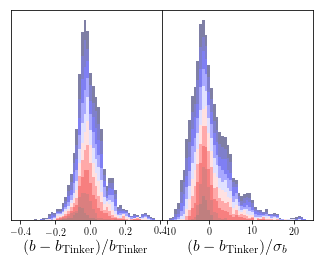

In [3]:
fig, axes = plt.subplots(ncols=2, nrows=1)
ax1, ax2 = axes[0], axes[1]
x1 = pd
x2 = pd/pde
xm1 = [x1[i==snap] for i in range(10)]
xm2 = [x2[i==snap] for i in range(10)]
ax1.hist(xm1, 50, color=colors, alpha=0.5, normed=True, histtype='bar', stacked=True)
ax2.hist(xm2, 50, color=colors, alpha=0.5, normed=True, histtype='bar', stacked=True)
ax1.set_xlabel(r"$(b-b_{\rm Tinker})/b_{\rm Tinker}$", fontsize=16)
ax2.set_xlabel(r"$(b-b_{\rm Tinker})/\sigma_b$", fontsize=16)
ax2.set_yticks([])
ax1.set_yticks([])
plt.subplots_adjust(bottom=0.15, left=0.2, hspace=0, wspace=0.0)
fig.savefig("bias_tinker_residuals_figure.png", dpi=400, bbox_inches='tight')